In [1]:
!pip install -q gradio
!pip install -Uqq fastai
!pip install -q nbdev

In [2]:
#/export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

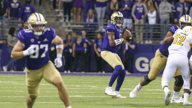

In [3]:
im = PILImage.create('uw_husky.jpg')
im.thumbnail((192,192))
im

In [24]:
#/export
learn = load_learner('model.pkl')

In [25]:
learn.predict(im)

('False', TensorBase(0), TensorBase([1.0000e+00, 1.3709e-08]))

In [26]:
#/export
categories = ('husky', 'cougar')

#gradio requires function for classifying image
def classify_image(img):
    #predict returns prediction as string, index, and probability
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [28]:
classify_image(im)

{'Dog': 1.0, 'Cat': 1.3708975288295733e-08}

In [29]:
#/export
image = gr.inputs.Image(shape = (192, 192))
label = gr.outputs.Label()
examples = ['uw_husky.jpg', 'wsu_cougar.jpg', 'oregon_duck.jpg']

intf = gr.Interface(fn = classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline = False)

/Users/gabe/opt/anaconda3/lib/python3.9/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/gabe/opt/anaconda3/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/gabe/opt/anaconda3/lib/python3.9/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/gabe/opt/anaconda3/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7fe092b89b20>, 'http://127.0.0.1:7861/', None)

# EXPORT

In [39]:
from nbdev.export import notebook2script

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/Users/gabe/opt/anaconda3/lib/python3.9/site-packages/nbdev/export.py)